In [1]:
#Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Create a set of random latitudes and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
#Import citipy
from citipy import citipy

In [5]:
#Create a list for holding the cities.
cities = []

#Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
#Print the city count to confirm sufficient count.
len(cities)

597

In [6]:
#Import the reqeusts library.
import requests

#Import the API key.
from config import weather_api_key

In [7]:
#Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [8]:
#Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []

#Print the beginning of the logging.
print("Beginning Data Retrieval")
print("------------------------")

#Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
 

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | chicama
Processing Record 2 of Set 1 | north platte
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | takoradi
Processing Record 5 of Set 1 | katsuura
Processing Record 6 of Set 1 | guerrero negro
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | hilo
Processing Record 9 of Set 1 | butaritari
Processing Record 10 of Set 1 | ribeira grande
Processing Record 11 of Set 1 | tiksi
Processing Record 12 of Set 1 | port lincoln
Processing Record 13 of Set 1 | torbay
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 16 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | terra nova
Processing Record 20 of Set 1 | camacupa
Processing Record 21 of Set 1 | cape town
Processin

Processing Record 34 of Set 4 | norman wells
Processing Record 35 of Set 4 | bonao
Processing Record 36 of Set 4 | nortelandia
Processing Record 37 of Set 4 | tezu
Processing Record 38 of Set 4 | sao joao da barra
Processing Record 39 of Set 4 | shasta lake
Processing Record 40 of Set 4 | yishui
Processing Record 41 of Set 4 | nizhnyaya omka
Processing Record 42 of Set 4 | kruisfontein
Processing Record 43 of Set 4 | acapulco
Processing Record 44 of Set 4 | dunedin
Processing Record 45 of Set 4 | blonduos
City not found. Skipping...
Processing Record 46 of Set 4 | dikson
Processing Record 47 of Set 4 | knyaze-volkonskoye
Processing Record 48 of Set 4 | narsaq
Processing Record 49 of Set 4 | bredasdorp
Processing Record 50 of Set 4 | airai
Processing Record 1 of Set 5 | bintulu
Processing Record 2 of Set 5 | arraial do cabo
Processing Record 3 of Set 5 | waspan
Processing Record 4 of Set 5 | keflavik
Processing Record 5 of Set 5 | grodzisk mazowiecki
Processing Record 6 of Set 5 | san a

Processing Record 24 of Set 8 | ambodifototra
City not found. Skipping...
Processing Record 25 of Set 8 | apaxtla
City not found. Skipping...
Processing Record 26 of Set 8 | touros
Processing Record 27 of Set 8 | aklavik
Processing Record 28 of Set 8 | eucaliptus
Processing Record 29 of Set 8 | okakarara
Processing Record 30 of Set 8 | serenje
Processing Record 31 of Set 8 | hamilton
Processing Record 32 of Set 8 | upernavik
Processing Record 33 of Set 8 | udachnyy
Processing Record 34 of Set 8 | draguignan
Processing Record 35 of Set 8 | hambantota
Processing Record 36 of Set 8 | haines junction
Processing Record 37 of Set 8 | thunder bay
Processing Record 38 of Set 8 | green river
Processing Record 39 of Set 8 | webuye
Processing Record 40 of Set 8 | bathsheba
Processing Record 41 of Set 8 | axim
Processing Record 42 of Set 8 | marcona
City not found. Skipping...
Processing Record 43 of Set 8 | lalmohan
Processing Record 44 of Set 8 | mana
Processing Record 45 of Set 8 | bam
Processi

Processing Record 13 of Set 12 | vostok
Processing Record 14 of Set 12 | santiago de cao
Processing Record 15 of Set 12 | navegantes
Processing Record 16 of Set 12 | jacqueville
Processing Record 17 of Set 12 | batagay-alyta
Processing Record 18 of Set 12 | warkworth
Processing Record 19 of Set 12 | kushmurun
Processing Record 20 of Set 12 | turukhansk
Processing Record 21 of Set 12 | kabala
Processing Record 22 of Set 12 | kewanee
Processing Record 23 of Set 12 | najran
Processing Record 24 of Set 12 | petrovac
Processing Record 25 of Set 12 | malinyi
Processing Record 26 of Set 12 | mombaca
Processing Record 27 of Set 12 | udala
Processing Record 28 of Set 12 | virginia beach
Processing Record 29 of Set 12 | verkhnevilyuysk
Processing Record 30 of Set 12 | sioux lookout
Processing Record 31 of Set 12 | tricase
Processing Record 32 of Set 12 | quatre cocos
Processing Record 33 of Set 12 | gbongan
Processing Record 34 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Rec

In [10]:
len(city_data)

549

In [11]:
#Convert the array of dictionaries top a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chicama,-7.8447,-79.1469,68.54,61,11,10.74,PE,2021-07-25 19:26:56
1,North Platte,41.1239,-100.7654,87.33,59,1,1.99,US,2021-07-25 19:26:56
2,Ushuaia,-54.8000,-68.3000,35.26,87,75,25.32,AR,2021-07-25 19:23:45
3,Takoradi,4.8845,-1.7554,75.83,77,25,10.78,GH,2021-07-25 19:26:56
4,Katsuura,35.1333,140.3000,80.11,86,29,11.12,JP,2021-07-25 19:26:57
5,Guerrero Negro,27.9769,-114.0611,77.43,58,92,10.29,MX,2021-07-25 19:26:57
6,Rikitea,-23.1203,-134.9692,70.50,67,76,6.44,PF,2021-07-25 19:26:57
7,Hilo,19.7297,-155.0900,82.80,86,90,4.61,US,2021-07-25 19:26:58
8,Butaritari,3.0707,172.7902,81.48,77,86,10.69,KI,2021-07-25 19:26:58
9,Ribeira Grande,38.5167,-28.7000,73.80,78,20,9.22,PT,2021-07-25 19:26:58


In [12]:
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chicama,-7.8447,-79.1469,68.54,61,11,10.74,PE,2021-07-25 19:26:56
1,North Platte,41.1239,-100.7654,87.33,59,1,1.99,US,2021-07-25 19:26:56
2,Ushuaia,-54.8000,-68.3000,35.26,87,75,25.32,AR,2021-07-25 19:23:45
3,Takoradi,4.8845,-1.7554,75.83,77,25,10.78,GH,2021-07-25 19:26:56
4,Katsuura,35.1333,140.3000,80.11,86,29,11.12,JP,2021-07-25 19:26:57
...,...,...,...,...,...,...,...,...,...
544,Mayo,38.8876,-76.5119,93.74,69,1,4.00,US,2021-07-25 19:29:55
545,Eyl,7.9803,49.8164,77.86,70,4,23.04,SO,2021-07-25 19:29:55
546,Novyy Urengoy,66.0833,76.6333,58.24,73,100,11.54,RU,2021-07-25 19:29:56
547,Luganville,-15.5333,167.1667,76.03,90,85,1.92,VU,2021-07-25 19:29:56


In [13]:
#Reorder the columns 
city_data_df_new_order = ["City", "Country", "Date","Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[city_data_df_new_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chicama,PE,2021-07-25 19:26:56,-7.8447,-79.1469,68.54,61,11,10.74
1,North Platte,US,2021-07-25 19:26:56,41.1239,-100.7654,87.33,59,1,1.99
2,Ushuaia,AR,2021-07-25 19:23:45,-54.8000,-68.3000,35.26,87,75,25.32
3,Takoradi,GH,2021-07-25 19:26:56,4.8845,-1.7554,75.83,77,25,10.78
4,Katsuura,JP,2021-07-25 19:26:57,35.1333,140.3000,80.11,86,29,11.12
...,...,...,...,...,...,...,...,...,...
544,Mayo,US,2021-07-25 19:29:55,38.8876,-76.5119,93.74,69,1,4.00
545,Eyl,SO,2021-07-25 19:29:55,7.9803,49.8164,77.86,70,4,23.04
546,Novyy Urengoy,RU,2021-07-25 19:29:56,66.0833,76.6333,58.24,73,100,11.54
547,Luganville,VU,2021-07-25 19:29:56,-15.5333,167.1667,76.03,90,85,1.92


In [14]:
#Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

#Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


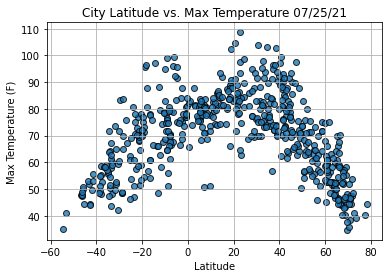

In [16]:
#Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig1.png")

#show plot.
plt.show()

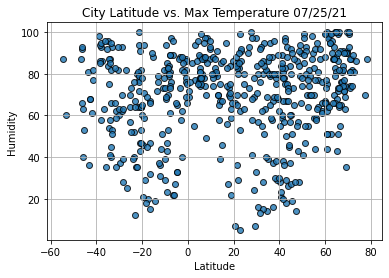

In [17]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig2.png")

#show plot.
plt.show()

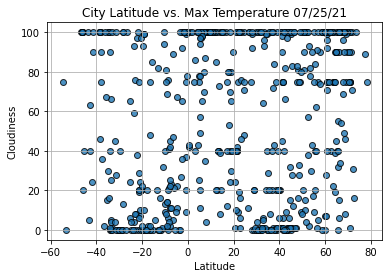

In [18]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig3.png")

#show plot.
plt.show()

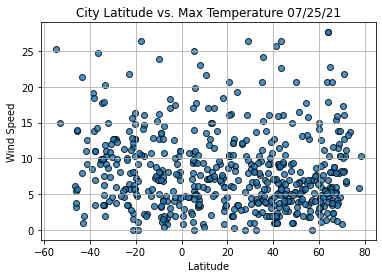

In [19]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig4.png")

#show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()  

In [21]:
#Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

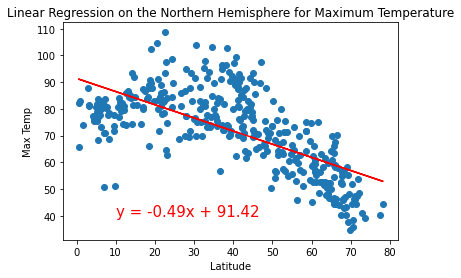

In [22]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

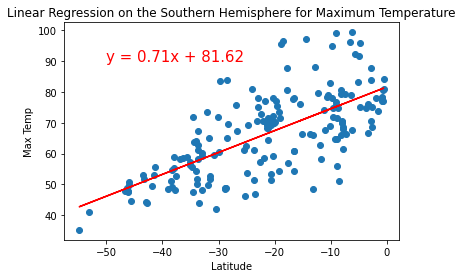

In [23]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

#Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere for Maximum Temperature", 'Max Temp', (-50,90))

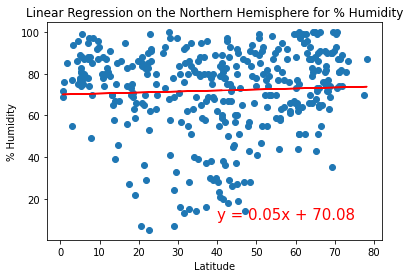

In [24]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

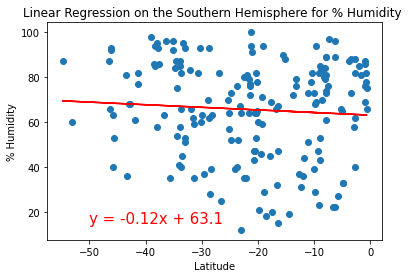

In [25]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

#Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere for % Humidity ", '% Humidity', (-50,15))

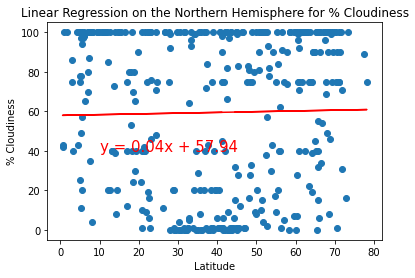

In [26]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(10,40))

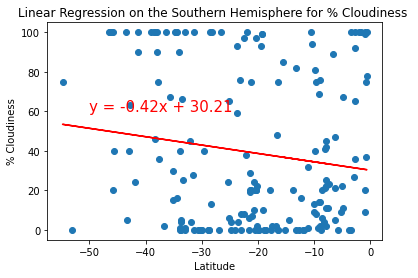

In [27]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

#Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere for % Cloudiness ", '% Cloudiness', (-50,60))

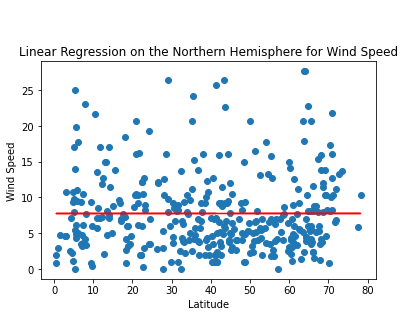

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

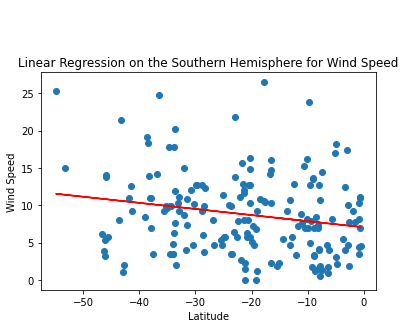

In [29]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

#Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere for Wind Speed", 'Wind Speed', (-50,35))